<a href="https://colab.research.google.com/github/prajwalbiradar21/Zomato_Dataset_Exploratory_Data_Analysis/blob/main/Zomato_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zomato Dataset Exploratory Data Analysis**

###### This Dataset is Taken from Kaggle.com

## **Understanding the Input Data**



Zomato is an Indian multinational restaurant aggregator and food delivery service founded in 2008 by Deepinder Goyal and Pankaj Chaddah. Headquartered in Gurugram, India, Zomato provides detailed restaurant listings, reviews, and ratings, along with online food delivery services in multiple countries. It also offers table reservations, dining-out options, and restaurant management solutions. Over the years, Zomato has expanded its services, acquired several companies, and evolved into a leading player in the global food tech industry.



We will explore the dataset to identify various trends, including the top countries, cities, and restaurants on Zomato, based on the available data. The dataset consists of 2 documents

*  a csv file having 21 columns containing details such as:

**'Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address','Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines','Average Cost for two', 'Currency', 'Has Table booking','Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text','Votes'**

 *  and an excel consisting of

 **'Country code' and 'Country'**. We will be using the encoding latin-1 while reading the csv file.

## **Problem Statement :**

The goal of this project is to analyze global Zomato restaurant data to understand trends in customer ratings, restaurant types, cuisines, pricing, online delivery availability, and geographical restaurant distribution.

## Importing Basic Libraries

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Datasets


In [306]:
zomato_df= pd.read_csv('/content/drive/MyDrive/Zomato EDA dataset/zomato.csv',encoding='latin-1')

pd.set_option('display.max_columns',None) # display all columns
pd.set_option('display.max_rows',100)

zomato_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


## Basic Checks Understanding of the Data

In [307]:
# check the number of rows and columns
print(zomato_df.shape)
print("no.of Rows:", zomato_df.shape[0]) # 0 --> rows
print("no. of Columns:", zomato_df.shape[1]) # 1 --> columns

(9551, 21)
no.of Rows: 9551
no. of Columns: 21


In [308]:
# to print all columns name
zomato_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [309]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [310]:
zomato_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


**Insights:**


*  This gives the stats of the numerical variables of the dataset.

*  The major observations to make here is the distribution of cost for 2 person (min:0, max:800000, mean:1199), price range, the aggregate rating (min:0, max:4.9, avg: 2.6), vote casted by people( min:0, max: 10934).



**In Data Analysis What All Things We Do**
1. Missing Values
2. Explore About the Numerical Variables
3. Explore About categorical Variables
4. Finding Relationship between features

In [311]:
# checking for null values

zomato_df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


<Axes: >

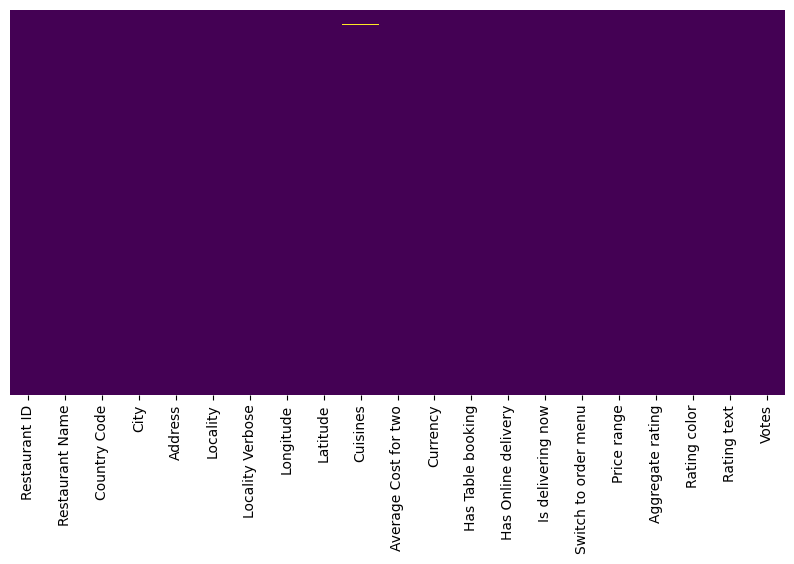

In [312]:
# check null values by heatmap

plt.figure(figsize=(10,5))

sns.heatmap(zomato_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Insights :**

There are no missing values in the dataset other than in "Cuisines" column which has 9 missing values.

## Adding and merging other dataset


In [313]:
country_code_df = pd.read_excel('/content/drive/MyDrive/Zomato EDA dataset/Country-Code.xlsx')

country_code_df.head(5)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [314]:
country_code_df.columns

Index(['Country Code', 'Country'], dtype='object')

In [315]:
zomato_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [316]:
final_df = pd.merge(zomato_df,country_code_df,on='Country Code',how='left')

final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [317]:
final_df.shape

(9551, 22)

In [318]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [319]:
# check the data types

final_df.dtypes

,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


In [320]:
final_df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [321]:
final_df.duplicated().sum()

np.int64(0)

**Insights :**

*  There are no duplicates in the dataset.
*   There are 9 missing values in the 'Cuisines' column , which is very small no. in ths dataset.

### Handling Missing Values :

In [322]:
final_df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [323]:
# replacing null values with 'Unknown'


final_df['Cuisines'] = final_df['Cuisines'].fillna('Unknown')

In [324]:
final_df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


**Insights :**

*  Imputed the few null values with "Unknown " in Cuisines column.

# **Feature Engineering :-**

### 1. Exploring the data to find the top Countries that uses Zomato.

In [325]:
countries=final_df.Country.value_counts()
countries

,count
Country,
India,8652
United States,434
United Kingdom,80
Brazil,60
South Africa,60
UAE,60
New Zealand,40
Turkey,34
Australia,24


In [326]:
country_names=final_df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'South Africa',
       'UAE', 'New Zealand', 'Turkey', 'Australia', 'Phillipines', 'Indonesia',
       'Qatar', 'Singapore', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [327]:
country_val=final_df.Country.value_counts().values
country_val

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

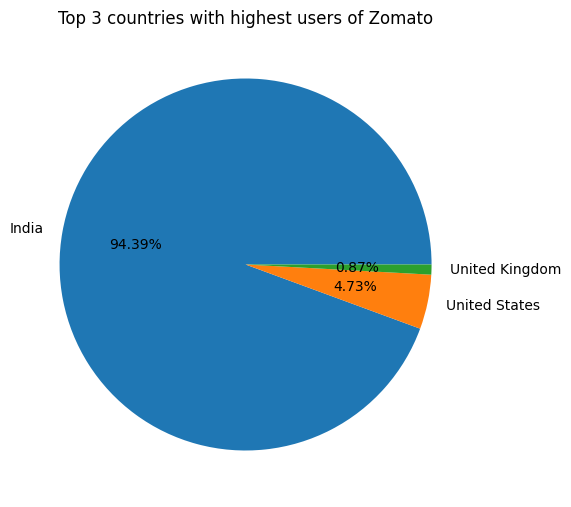

In [328]:
#pie chart - for top 3 countries that uses zomato

plt.figure(figsize=(6,8))

plt.pie(country_val[ :3],labels=country_names[ :3],autopct='%1.2f%%')

plt.title('Top 3 countries with highest users of Zomato')

plt.show()

**Insights:**

Zomato Maximum Customers/records/transactions are from India followed by USA and United Kingdome(UK).

### 2.Explore the data for ratings

In [329]:
#check for ratings


In [330]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [331]:
ratings= final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0 : 'Rating_count'})

ratings

,Aggregate rating,Rating color,Rating text,Rating_count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


**Insights :**

1. When Rating are in  between 4.5 to 4.9---> Excellent - *(Dark Green)*
2. When Rating are in between 4.0 to 3.4--->very good - *(Green)*
3. when Rating are in between 3.5 to 3.9----> good - *(Yellow)*
4. when Rating are in between 3.0 to 3.4----> average - *(Orange)*
5. when Rating are in between 2.5 to 2.9----> average - *(Orange)*
6. when Rating are in between 2.0 to 2.4----> Poor - *(Red)*
7. when rating is 0.0 --> Customer not rated - *(White)*

In [332]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating_count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


In [333]:
# lets plot the graphs for visualisations


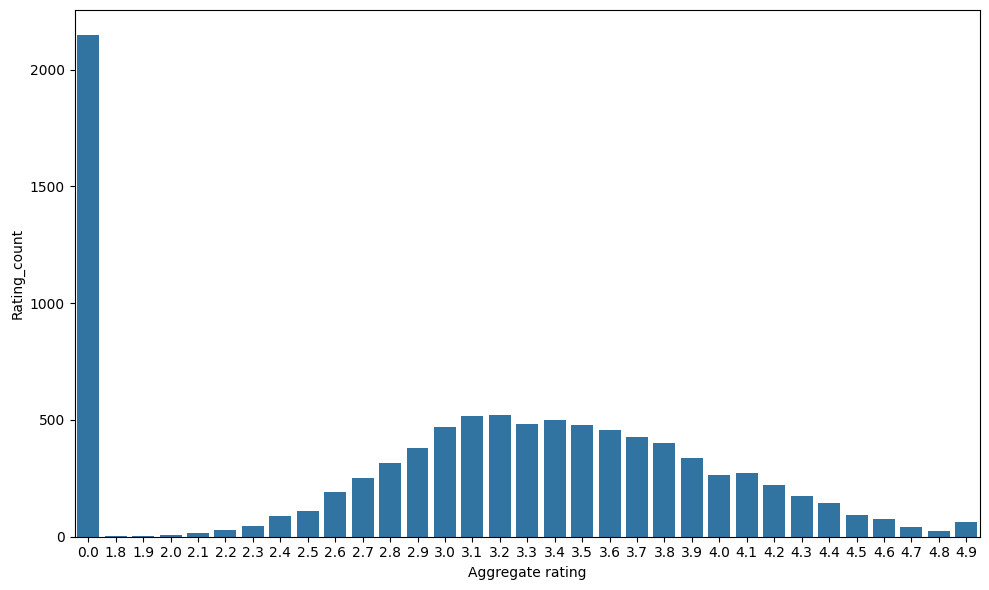

In [334]:
## Barplot

plt.figure(figsize=(10,6))

sns.barplot( x='Aggregate rating' , y= 'Rating_count', data=ratings)

plt.tight_layout()
plt.show()

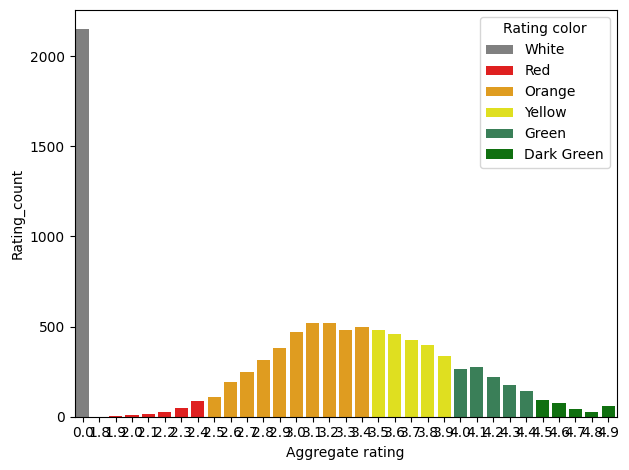

In [335]:
#or

sns.barplot( x='Aggregate rating' , y= 'Rating_count',hue='Rating color' ,data=ratings ,palette=['grey','red','orange','yellow','seagreen','green'])
plt.tight_layout()
plt.show()

**Insights :**

1. Customers who have Not Rated have high rating count.
2. Maximum no. of rating are b/w 2.5 to 3.4

/tmp/ipython-input-3561553772.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating color', data=ratings , palette=['Grey','Red','Orange','Yellow','seagreen','Green'])


<Axes: xlabel='Rating color', ylabel='count'>

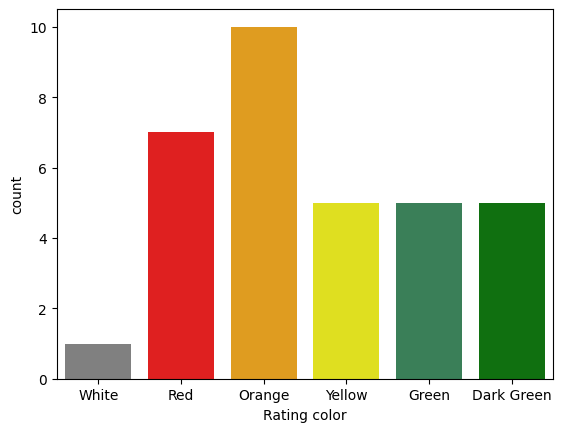

In [336]:
## countplot

sns.countplot(x='Rating color', data=ratings , palette=['Grey','Red','Orange','Yellow','seagreen','Green'])



In [337]:
ratings

,Aggregate rating,Rating color,Rating text,Rating_count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


### 3. Exploring the data having zero ratings.

In [338]:
#finding the countries that have given 0 ratings

zero_ratings=final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0 : '_counts'})

zero_ratings


,Country,_counts
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [339]:
final_df.groupby(['Aggregate rating','Country']).size().reset_index()

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1
...,...,...,...
217,4.9,Sri Lanka,1
218,4.9,Turkey,3
219,4.9,UAE,4
220,4.9,United Kingdom,4


**Insights :**

By Observing the tables , the maximum no. of 0.0 ratings are Indian customers.

### 4.Exploring the data as per country and their currancy spend.

In [340]:
## Find the currency used by which countries.

In [341]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [342]:
final_df[['Country','Currency']]

,Country,Currency
0,Phillipines,Botswana Pula(P)
1,Phillipines,Botswana Pula(P)
2,Phillipines,Botswana Pula(P)
3,Phillipines,Botswana Pula(P)
4,Phillipines,Botswana Pula(P)
...,...,...
9546,Turkey,Turkish Lira(TL)
9547,Turkey,Turkish Lira(TL)
9548,Turkey,Turkish Lira(TL)
9549,Turkey,Turkish Lira(TL)


In [343]:
country_currency=final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index().rename(columns= {0 :'Currency_count'})

country_currency

,Country,Currency,Currency_count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


### 5.Exploring Data for countries having most of the online orders.

In [344]:

## Which Countries do have online deliveries option

In [345]:
online_delivery=final_df['Has Online delivery'].value_counts()
online_delivery

,count
Has Online delivery,
No,7100
Yes,2451


/tmp/ipython-input-2256827237.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.barplot(x=online_delivery.index, y=online_delivery,hue=online_delivery ,color='blue')


<Axes: xlabel='Has Online delivery', ylabel='count'>

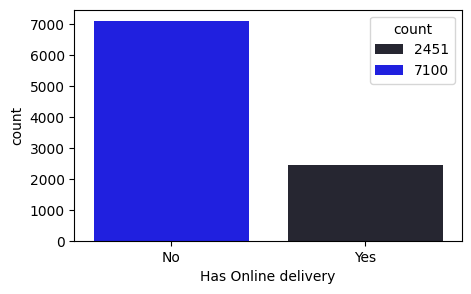

In [346]:
plt.figure(figsize=(5,3))

sns.barplot(x=online_delivery.index, y=online_delivery,hue=online_delivery ,color='blue')

In [347]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [348]:
final_df[final_df['Has Online delivery']=='Yes'].Country.value_counts()

,count
Country,
India,2423
UAE,28


In [349]:
final_df.groupby(['Has Online delivery','Country']).size().reset_index().rename(columns= {0 : 'Count_'})

,Has Online delivery,Country,Count_
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


**Insights:**

Most of the Online Deliveries are in Contry India and UAE.

In [350]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [351]:
delivery_city=final_df[final_df['Country']=='India'].groupby(['City','Has Online delivery']).size().reset_index()
delivery_city.head()

,City,Has Online delivery,0
0,Agra,No,20
1,Ahmedabad,No,10
2,Ahmedabad,Yes,11
3,Allahabad,No,20
4,Amritsar,No,21


In [352]:
online_delivery=delivery_city[delivery_city['Has Online delivery']=='Yes'].rename(columns={0 :'Count'})
online_df=online_delivery.sort_values(by='Count',ascending=False,ignore_index=True)
online_df

,City,Has Online delivery,Count
0,New Delhi,Yes,1489
1,Gurgaon,Yes,425
2,Noida,Yes,364
3,Faridabad,Yes,35
4,Chennai,Yes,13
5,Ahmedabad,Yes,11
6,Nagpur,Yes,10
7,Jaipur,Yes,10
8,Ghaziabad,Yes,10
9,Kolkata,Yes,8


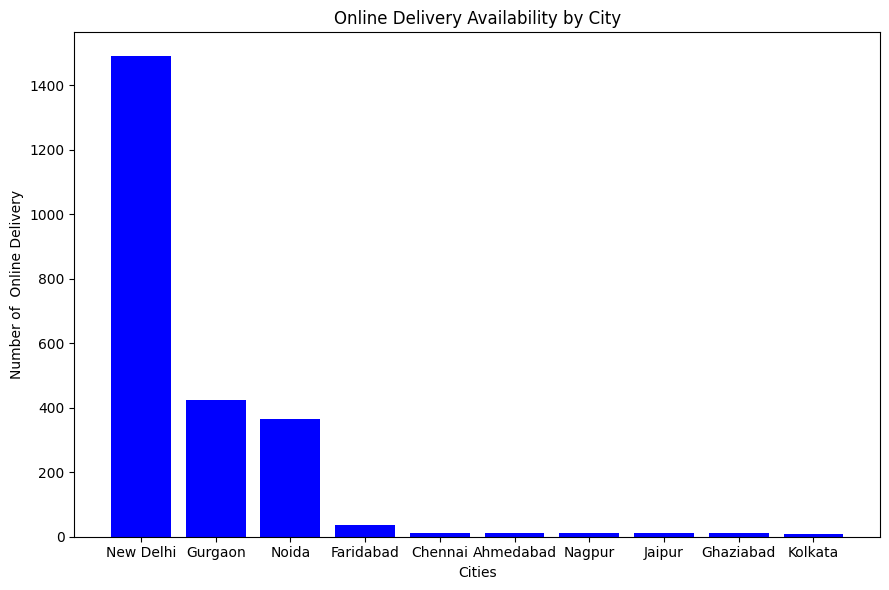

In [353]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

plt.bar(online_df['City'][:10], online_df['Count'][:10],color='Blue')

plt.title("Online Delivery Availability by City")
plt.xlabel('Cities')
plt.ylabel("Number of  Online Delivery")
plt.tight_layout()
plt.show()

**Insights :**

Here we can see that the City New Delhi Has the Highest No. of Online Deliveries that counts to 1489 as followed by Gurgaon(425) and Noida(364),etc...

### 6.Exploring data for top 5 cites with most orders

In [354]:
## Create a pie chart for top 5 cities distribution

In [355]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [356]:
final_df['City']

,City
0,Makati City
1,Makati City
2,Mandaluyong City
3,Mandaluyong City
4,Mandaluyong City
...,...
9546,ÛÁstanbul
9547,ÛÁstanbul
9548,ÛÁstanbul
9549,ÛÁstanbul


In [357]:
final_df['City'].value_counts()

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
...,...
Lakes Entrance,1
Mohali,1
Panchkula,1


In [358]:
city_labels=final_df.City.value_counts().index
city_labels

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Lucknow', 'Ahmedabad', 'Amritsar', 'Guwahati',
       ...
       'Forrest', 'East Ballina', 'Huskisson', 'Inverloch', 'Lakeview',
       'Lakes Entrance', 'Mohali', 'Panchkula', 'Bandung', 'Randburg'],
      dtype='object', name='City', length=141)

In [359]:
city_values=final_df.City.value_counts().values
city_values

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         18,   18,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1])

([<matplotlib.patches.Wedge at 0x79c0e482f050>,
 [Text(-0.6145353730323401, 0.9123301350344637, 'New Delhi'),
  Text(0.06236774886414425, -1.0982305149200777, 'Gurgaon'),
  Text(0.878904221413572, -0.6614585169014024, 'Noida'),
  Text(1.0922218482114119, -0.1305811406354216, 'Faridabad'),
  Text(1.099946277419523, -0.010871374841004297, 'Ghaziabad')],
 [Text(-0.33520111256309454, 0.4976346191097074, '68.87%'),
  Text(0.03401877210771504, -0.5990348263200423, '14.07%'),
  Text(0.479402302589221, -0.36079555467349217, '13.59%'),
  Text(0.5957573717516791, -0.07122607671022996, '3.16%'),
  Text(0.5999706967742853, -0.00592984082236598, '0.31%')])

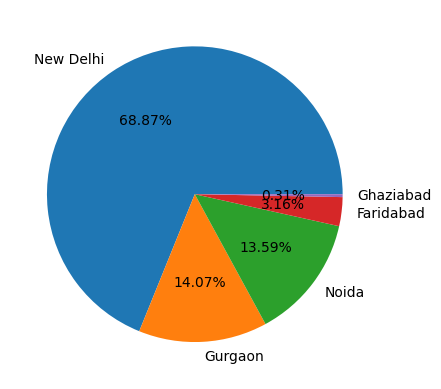

In [360]:
#pie chart

plt.pie(x=city_values[ : 5],labels=city_labels[ :5],autopct='%1.2f%%')

**Insights :**

*  Delhi has the most number orders , thats makes 68.87% followed by other Indian Cities.




### 7.Exploring data for the Cuisines available

In [361]:
## Find the top 10 cuisines

In [362]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [363]:
final_df['City']

,City
0,Makati City
1,Makati City
2,Mandaluyong City
3,Mandaluyong City
4,Mandaluyong City
...,...
9546,ÛÁstanbul
9547,ÛÁstanbul
9548,ÛÁstanbul
9549,ÛÁstanbul


In [364]:
top_cuisines=final_df['Cuisines'].value_counts()
top_cuisines

,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Fast Food,354
Chinese,354
"North Indian, Mughlai",334
...,...
"North Indian, Continental, Chinese, Italian, Mexican",1
"North Indian, Continental, Chinese, Mexican, Italian, Desserts",1
"Southern, Cajun, Soul Food",1


([<matplotlib.patches.Wedge at 0x79c0e4788f80>,
 [Text(0.4175822660282447, 1.0176566469584505, 'North Indian'),
  Text(-1.0901695016598902, 0.14673260595595905, 'North Indian, Chinese'),
  Text(-0.6326707688864324, -0.8998487085041855, 'Fast Food'),
  Text(0.30487652953108235, -1.0569060042128076, 'Chinese'),
  Text(1.003691693758835, -0.4501144119882426, 'North Indian, Mughlai')],
 [Text(0.22777214510631527, 0.5550854437955184, '37.61%'),
  Text(-0.5946379099963037, 0.08003596688506857, '20.53%'),
  Text(-0.3450931466653267, -0.49082656827501026, '14.22%'),
  Text(0.1662962888351358, -0.5764941841160768, '14.22%'),
  Text(0.5474681965957281, -0.24551695199358683, '13.42%')])

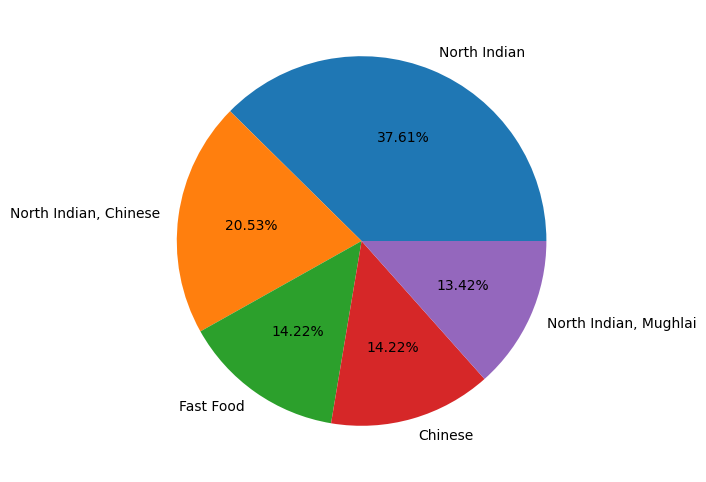

In [365]:
plt.figure(figsize=(12,6))

plt.pie(x=top_cuisines[ :5].values,labels=top_cuisines[ :5].index,autopct='%.2f%%')

In [366]:
top_cuisines.values

array([936, 511, 354, ...,   1,   1,   1])

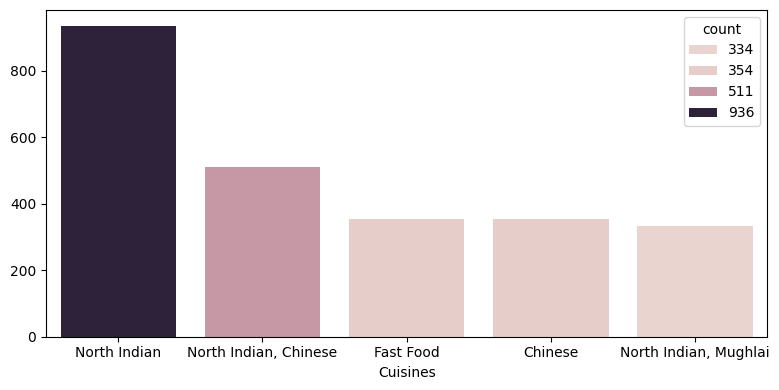

In [367]:

plt.figure(figsize=(8,4))
sns.barplot(x=top_cuisines.index[:5] ,y=top_cuisines.values[:5],hue=top_cuisines[:5])

plt.tight_layout()

**Insights :**

The top cuisine is North Indian dishes which is comprising near to 38% as the categories are mixed. This is inline with the fact that the top cities are from northern india.  

### 8.Exploring Top 10 Resturants

In [368]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [369]:
top_resturants = final_df[['Restaurant Name','Country','Aggregate rating','Votes']].sort_values(by=['Aggregate rating','Votes'], ascending=False)[:10]
top_resturants

,Restaurant Name,Country,Aggregate rating,Votes
2414,Barbeque Nation,India,4.9,5966
2307,AB's - Absolute Barbecues,India,4.9,5434
2495,Mirchi And Mime,India,4.9,3244
3013,Naturals Ice Cream,India,4.9,2620
374,McGuire's Irish Pub & Brewery,United States,4.9,2238
9296,Talaga Sampireun,Indonesia,4.9,2212
3601,Indian Accent - The Manor,India,4.9,1934
2409,Barbeque Nation,India,4.9,1753
9279,Talaga Sampireun,Indonesia,4.9,1662
9291,Talaga Sampireun,Indonesia,4.9,1640


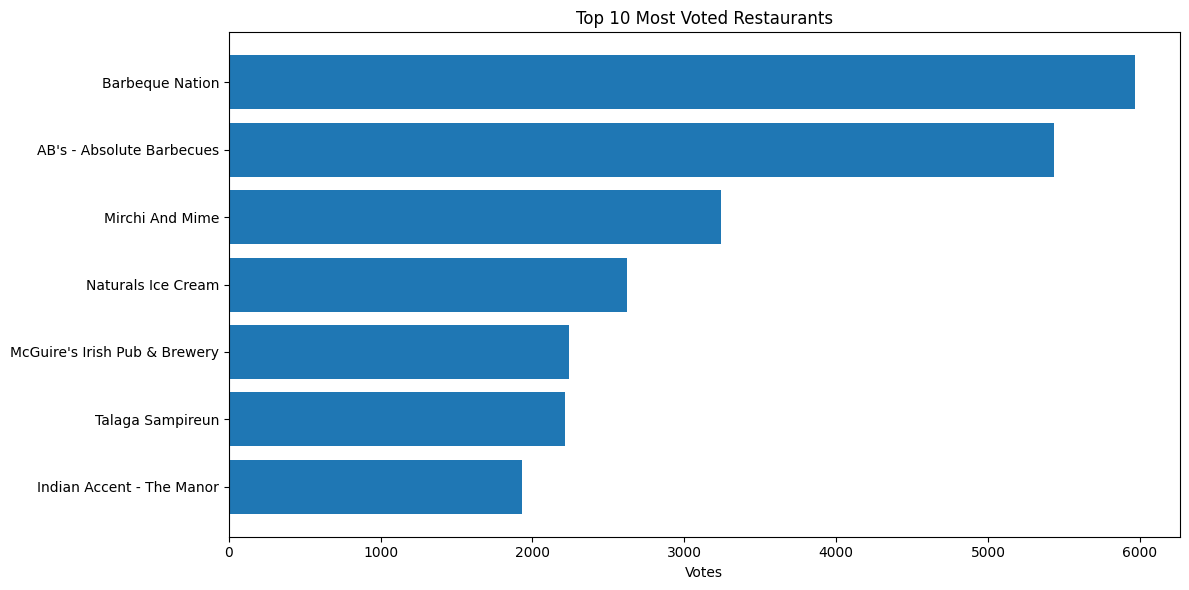

In [370]:
# visualisations

plt.figure(figsize=(12,6))

plt.barh(top_resturants['Restaurant Name'] ,top_resturants['Votes'])

plt.xlabel("Votes")
plt.title("Top 10 Most Voted Restaurants")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

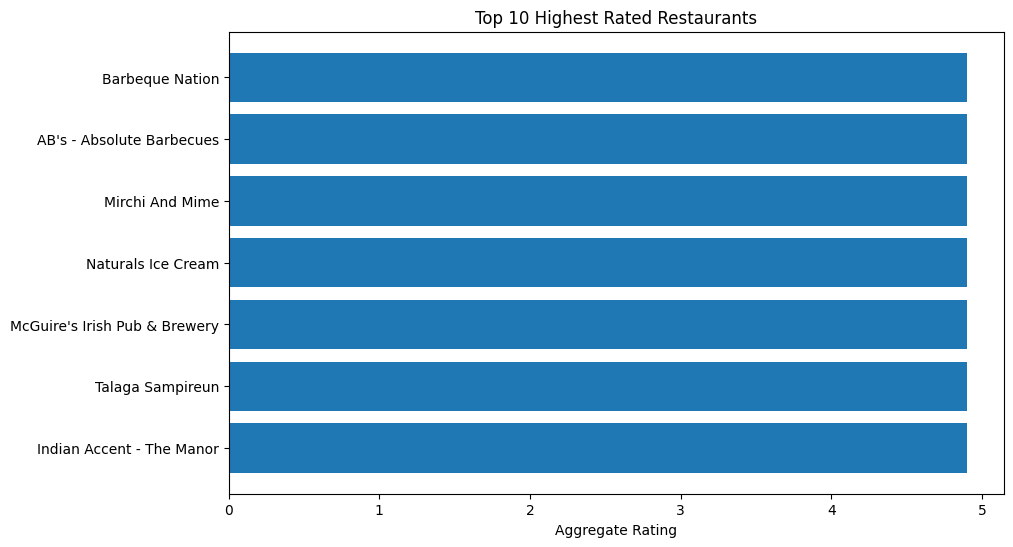

In [371]:
plt.figure(figsize=(10,6))
plt.barh(top_resturants['Restaurant Name'], top_resturants['Aggregate rating'])
plt.xlabel("Aggregate Rating")
plt.title("Top 10 Highest Rated Restaurants")
plt.gca().invert_yaxis()
plt.show()


### 9.Exploring correlation between numerical columns .


In [372]:
final_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [373]:
correlation_matrix=final_df[['Average Cost for two','Price range','Aggregate rating','Votes']].corr()

correlation_matrix


,Average Cost for two,Price range,Aggregate rating,Votes
Average Cost for two,1.000000,0.075083,0.051792,0.067783
Price range,0.075083,1.000000,0.437944,0.309444
Aggregate rating,0.051792,0.437944,1.000000,0.313691
Votes,0.067783,0.309444,0.313691,1.000000


<Axes: >

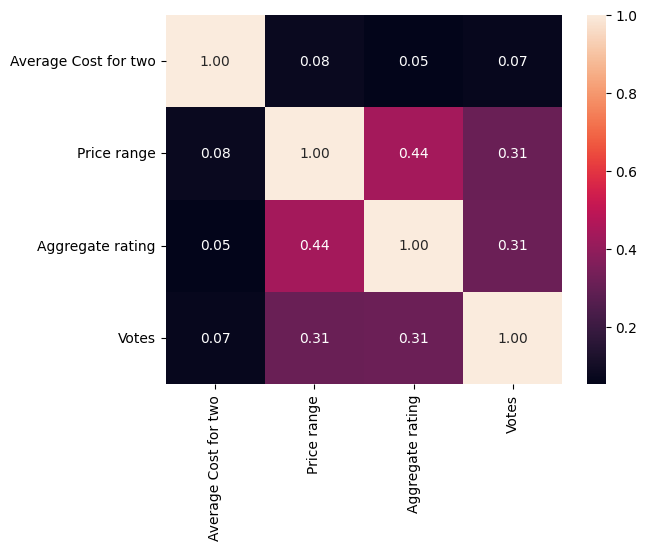

In [374]:
sns.heatmap(correlation_matrix,fmt='.2f',annot=True)

In [375]:
cost_per_vote= final_df[['Price range','Aggregate rating','Votes']]

cost_per_vote

,Price range,Aggregate rating,Votes
0,3,4.8,314
1,3,4.5,591
2,4,4.4,270
3,4,4.9,365
4,4,4.8,229
...,...,...,...
9546,3,4.1,788
9547,3,4.2,1034
9548,4,3.7,661
9549,4,4.0,901


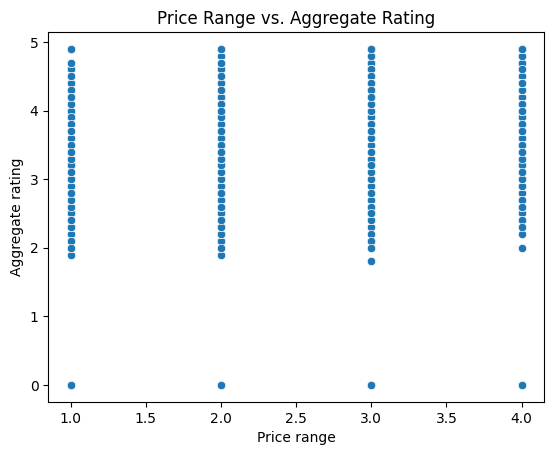

In [376]:
sns.scatterplot(x=cost_per_vote['Price range'], y=cost_per_vote['Aggregate rating'])
plt.title('Price Range vs. Aggregate Rating')
plt.show()

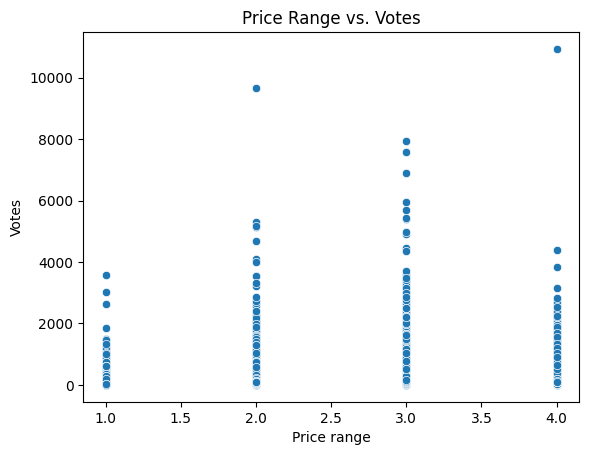

In [377]:
sns.scatterplot(x=cost_per_vote['Price range'], y=cost_per_vote['Votes'])
plt.title('Price Range vs. Votes')
plt.show()

### **Conclusion :**



Our analysis of the Zomato dataset has provided several key insights into restaurant operations and customer preferences. The data is predominantly from India, with New Delhi emerging as the most active city in Zomato’s operations. North Indian cuisine stands out as the most popular choice among customers, reflecting regional dining preferences.

When it comes to restaurant ratings, a significant portion of establishments remain unrated, indicating that many places either receive limited customer engagement or are newly listed. Among rated restaurants, the majority of ratings fall between 2.5 and 3.4, suggesting that most dining experiences are perceived as average.

In terms of service availability, only 2,451 restaurants offer online delivery, highlighting that a large number of establishments still rely on dine-in or takeaway options rather than digital platforms. These findings provide valuable insights into restaurant trends, customer behavior, and areas where improvements, such as enhancing online delivery services or encouraging more customer feedback, could benefit businesses.